In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.color import rgb2lab
from skimage.transform import resize
from collections import namedtuple

np.random.seed(101)
%matplotlib inline

In [2]:
# Number of Classes
n_class = 43
resized_img = (32,32)

In [3]:
data = namedtuple('Dataset', ['X', 'y'])

In [4]:
def to_tf_format(imgs):
    return np.stack([img[:, :, np.newaxis] for img in imgs], axis=0).astype(np.float32)

In [18]:
def read_dataset_ppm(rootpath, n_labels, resize_to):
    images = []
    labels = []
    for c in range(n_labels):
        full_path  = rootpath + '/' + format(c, '05d') + '/'
        for img_name in glob.glob(full_path + "*.ppm"):

            img = plt.imread(img_name).astype(np.float32)
            img = rgb2lab(img / 255.0)[:, :, 0]
            if resize_to:
                img = resize(img, resize_to, mode='reflect')

            label = np.zeros((n_labels, ), dtype=np.float32)
            label[c] = 1.0

            images.append(img.astype(np.float32))
            labels.append(label)
        
    return data(X = to_tf_format(images).astype(np.float32), y = np.matrix(labels).astype(np.float32))

In [19]:

dataset = read_dataset_ppm('GTSRB/Final_Training/Images/', n_class, resized_img)

print(dataset.X.shape)
print(dataset.y.shape)
        
        

/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


(39209, 32, 32, 1)
(39209, 43)


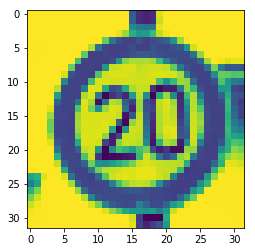

In [20]:
plt.imshow(dataset.X[0, :, :, :].reshape(resized_img))

In [21]:
print(dataset.y[0, :])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


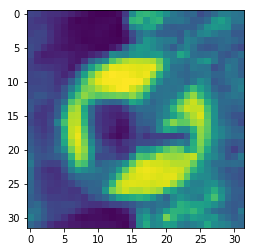

In [22]:
plt.imshow(dataset.X[-1, :, :, :].reshape(resized_img))

In [23]:
print(dataset.y[-1,:])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
